### Load Data

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load Dataset
df = pd.read_excel("bank_full_dataset.xlsx")

# Preview data
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Description

In [2]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
df.info()

Shape of dataset: (45211, 17)

Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutco

In [3]:
df.describe(include="all").transpose()
# to find out number of unique values

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


#### Missing Value Check

In [4]:
print("Missing Values per Column:\n", df.isnull().sum())
print("\n'unknown' counts (treated as missing in categorical):")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].value_counts().get('unknown',0)}")


Missing Values per Column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

'unknown' counts (treated as missing in categorical):
job: 288
marital: 0
education: 1857
default: 0
housing: 0
loan: 0
contact: 13020
month: 0
poutcome: 36959
y: 0


#### Class Balance

Target distribution:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


C:\Users\u507148\AppData\Local\Temp\ipykernel_21452\1450545139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="viridis")


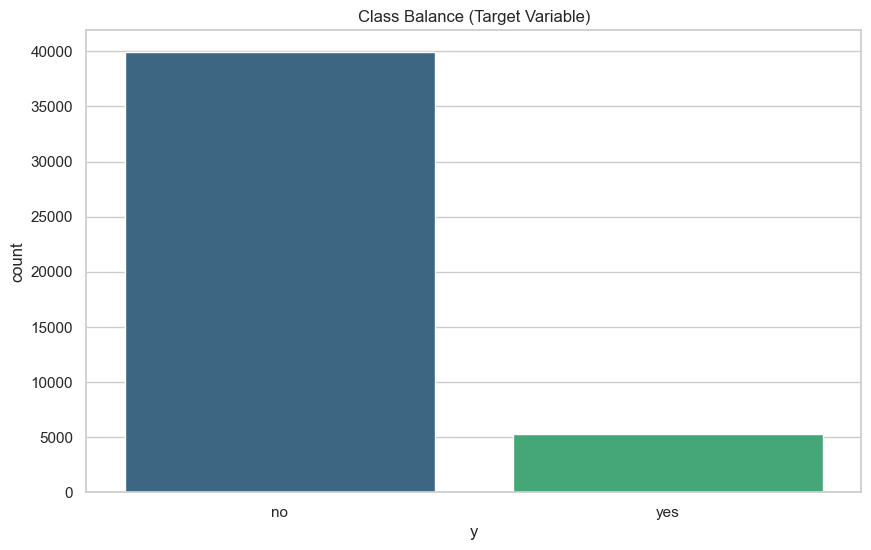

In [5]:
print("Target distribution:")
print(df['y'].value_counts(normalize=True)*100)

sns.countplot(x="y", data=df, palette="viridis")
plt.title("Class Balance (Target Variable)")
plt.show()

#### Outlier Detection

In [6]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_rows = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Append outlier rows
    outlier_rows = pd.concat([outlier_rows, df[(df[col] < lower_bound) | (df[col] > upper_bound)]])
    
# Drop duplicates (same row could be outlier in multiple columns)
outlier_rows = outlier_rows.drop_duplicates()

outlier_rows.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes


#### Encoding Categorical Variables

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = ["job", "marital", "education", "default", 
                        "housing", "loan", "contact", "month", "poutcome"]
numeric_features = ["age", "balance", "day", "duration", 
                    "campaign", "pdays", "previous"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

### EDA

#### Age VS Subscription

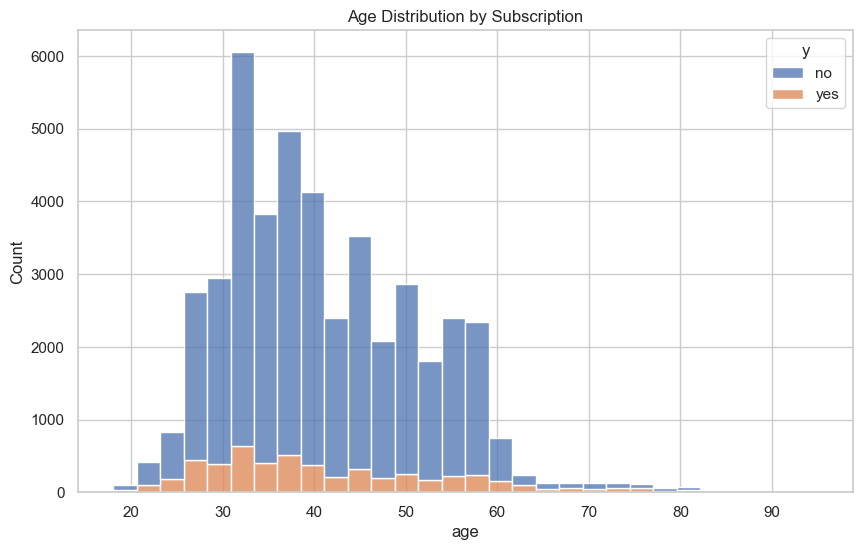

In [15]:
sns.histplot(data=df, x="age", hue="y", multiple="stack", bins=30)
plt.title("Age Distribution by Subscription")
plt.show()


#### Job VS Subscription

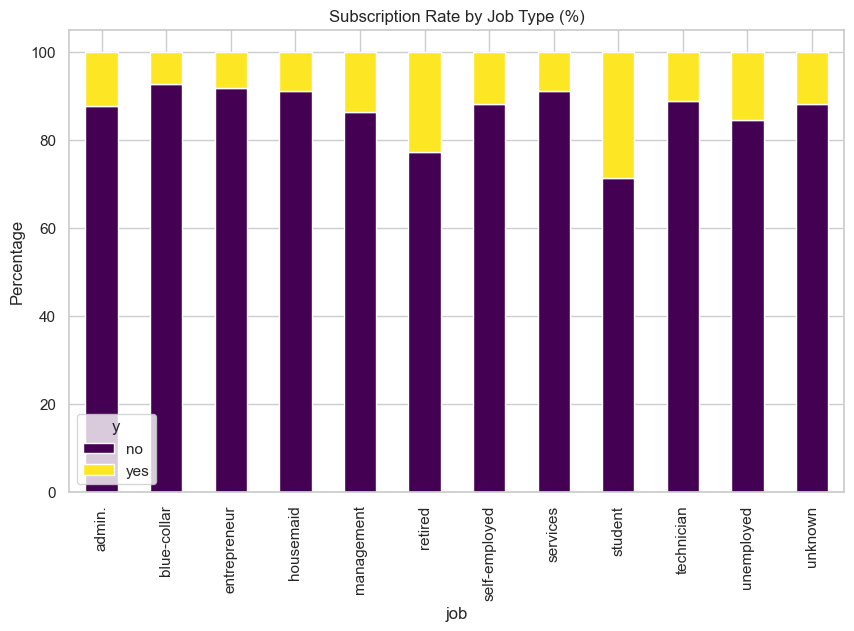

In [16]:
job_success = pd.crosstab(df["job"], df["y"], normalize="index")*100
job_success.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Subscription Rate by Job Type (%)")
plt.ylabel("Percentage")
plt.show()


Education vs Subscription (with Unknown)

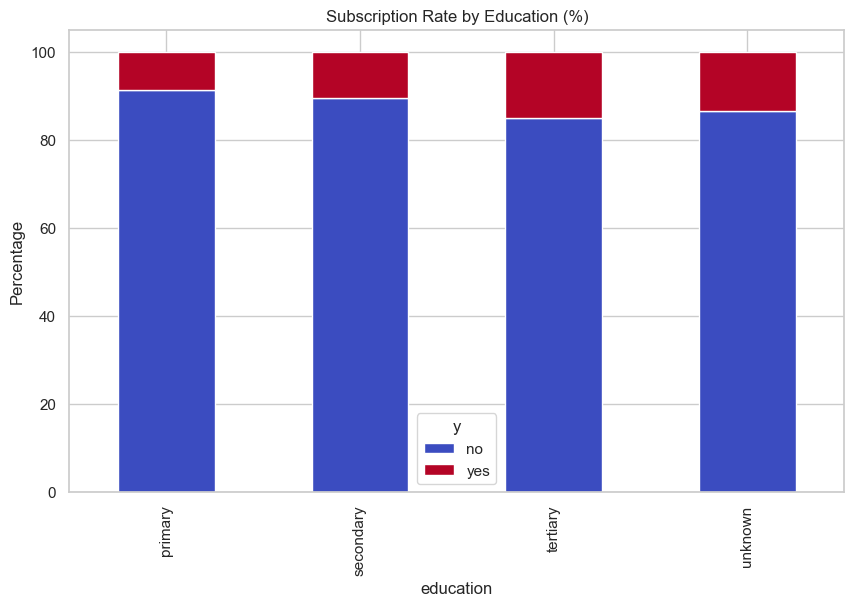

In [17]:
edu_success = pd.crosstab(df["education"], df["y"], normalize="index")*100
edu_success.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Subscription Rate by Education (%)")
plt.ylabel("Percentage")
plt.show()


#### Contact Type vs Subscription

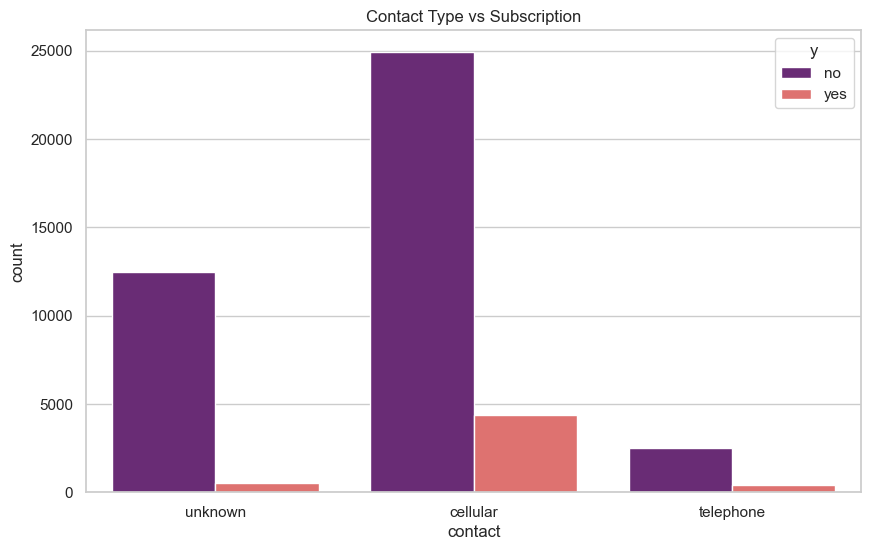

In [18]:
sns.countplot(data=df, x="contact", hue="y", palette="magma")
plt.title("Contact Type vs Subscription")
plt.show()


#### Campaign Variables vs Subscription

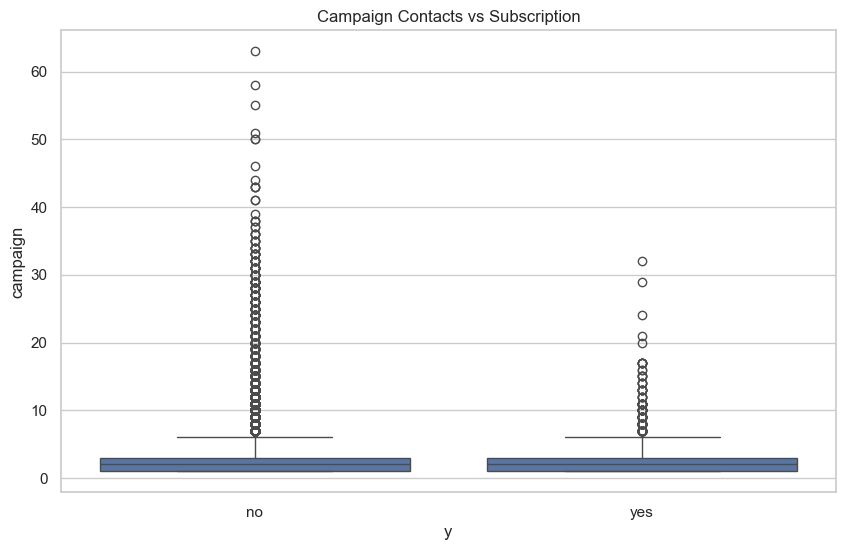

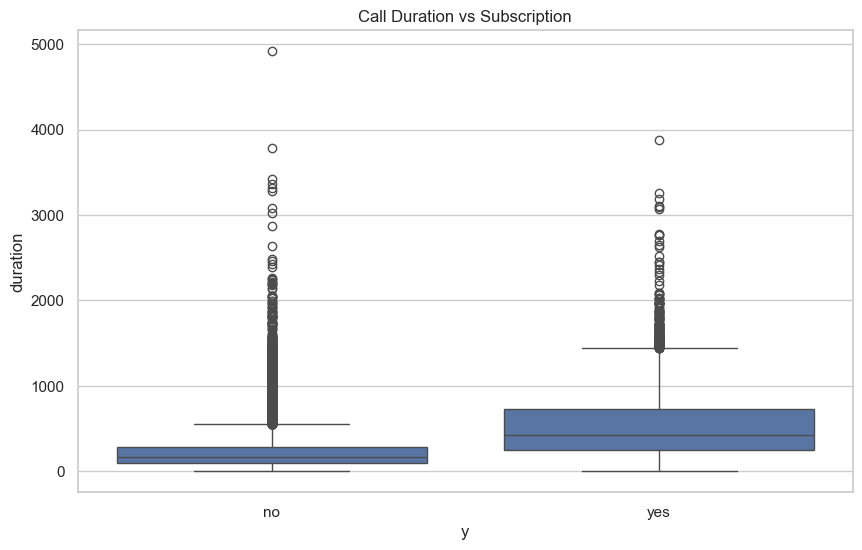

In [19]:
sns.boxplot(x="y", y="campaign", data=df)
plt.title("Campaign Contacts vs Subscription")
plt.show()

sns.boxplot(x="y", y="duration", data=df)
plt.title("Call Duration vs Subscription")
plt.show()


#### Correlation Heatmap

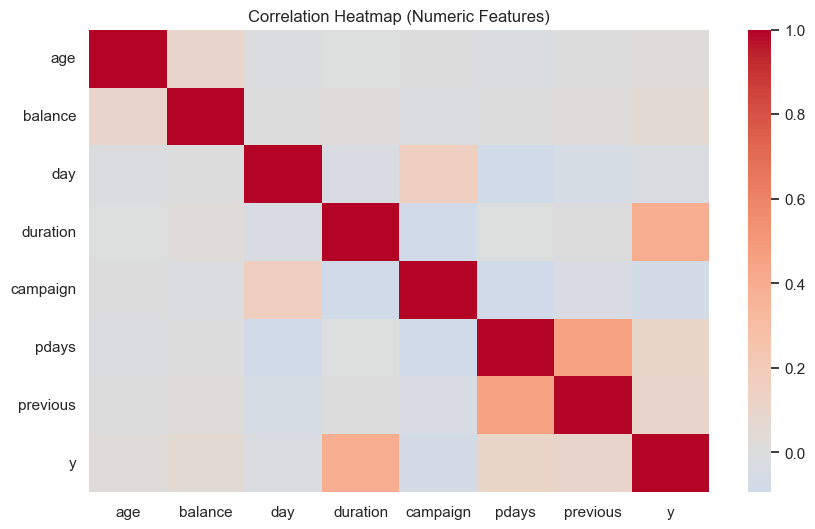

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target variable only
df_corr = df.copy()
df_corr["y"] = df_corr["y"].map({"yes": 1, "no": 0})

# Select only numeric columns
numeric_df = df_corr.select_dtypes(include=["int64", "float64"])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



#### Logistic Regression Pipeline (Baseline Model)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

# Features and target
X = df.drop("y", axis=1)
y = df["y"].map({"yes": 1, "no": 0})   # only encode target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression with preprocessing pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),   # defined earlier (scaling + one-hot)
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Fit model
log_reg_pipeline.fit(X_train, y_train)

# Predict
y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Baseline ROC-AUC:", roc_auc_score(y_test, y_prob))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043

Baseline ROC-AUC: 0.9079218714674134


#### Domain Knowledge Features

##### Age Bucket

In [24]:
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 30, 50, 100], 
                         labels=['young', 'middle-aged', 'senior'])

##### Contact History Indicators

In [25]:
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x==-1 else 1)
df['repeat_contact'] = df['previous'].apply(lambda x: 1 if x>0 else 0)


##### Call Duration Flag

In [26]:
df['short_call'] = df['duration'].apply(lambda x: 1 if x < 60 else 0)

#### Transformations

##### Interaction Features

In [27]:
df['wealth_age'] = df['balance'] * df['age']
df['loan_combo'] = df.apply(lambda x: 1 if x['housing']=="yes" and x['loan']=="yes" else 0, axis=1)


#### Model Development

##### Decision Tree Pipeline (interpretable)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Decision Tree with preprocessing pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),   # scaling + one-hot encoding
    ("model", DecisionTreeClassifier(
        max_depth=5, 
        class_weight="balanced", 
        random_state=42
    ))
])

# Fit model
dt_pipeline.fit(X_train, y_train)

# Predict
y_prob = dt_pipeline.predict_proba(X_test)[:, 1]

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob))



Decision Tree ROC-AUC: 0.8740905975641945


##### LightGBM Pipeline (Gradient Boosting)

In [31]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# LightGBM with preprocessing pipeline
lgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("model", LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        class_weight="balanced",
        random_state=42
    ))
])

# Fit model
lgb_pipeline.fit(X_train, y_train)

# Predict
y_prob = lgb_pipeline.predict_proba(X_test)[:, 1]

print("LightGBM ROC-AUC:", roc_auc_score(y_test, y_prob))



[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM ROC-AUC: 0.9332045079798725


c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##### CatBoost Pipeline

In [32]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# CatBoost with preprocessing pipeline
cat_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        class_weights=[1, 5],  # handle imbalance
        verbose=0,
        random_state=42
    ))
])

# Fit
cat_pipeline.fit(X_train, y_train)

# Predict
y_prob = cat_pipeline.predict_proba(X_test)[:, 1]

print("CatBoost ROC-AUC:", roc_auc_score(y_test, y_prob))



CatBoost ROC-AUC: 0.9357488580313039


#### Hyperparameter Tuning

##### Decision Tree Pipeline with GridSearchCV

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define parameter grid for decision tree inside pipeline
param_grid = {
    "model__max_depth": [3, 5, 7, 10, None],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__criterion": ["gini", "entropy"]
}

# Pipeline with preprocessing + model
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])

# Grid search
grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Params (Decision Tree):", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Params (Decision Tree): {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}
Best ROC-AUC: 0.8915318944314814


##### LightGBM Pipeline with Optuna

In [35]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def objective_lgb(trial):
    # Hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "class_weight": "balanced",
        "random_state": 42
    }

    # Build pipeline with preprocessing + model
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", LGBMClassifier(**params))
    ])

    # Cross-validation with ROC-AUC
    auc = cross_val_score(
        pipeline, X_train, y_train,
        cv=3,
        scoring="roc_auc",
        n_jobs=-1
    ).mean()

    return auc

# Run Optuna optimization
study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=30)

print("Best Params (LightGBM):", study_lgb.best_params)
print("Best ROC-AUC:", study_lgb.best_value)



c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-09-24 09:21:03,353] A new study created in memory with name: no-name-9c7b8207-5c3a-4d32-8676-aac7dbbdd75c
[I 2025-09-24 09:21:10,448] Trial 0 finished with value: 0.9292956725702638 and parameters: {'n_estimators': 339, 'learning_rate': 0.19338898033823265, 'max_depth': 14, 'num_leaves': 91, 'subsample': 0.5801212603717931, 'colsample_bytree': 0.9297757868782437, 'reg_alpha': 4.87226796764998, 'reg_lambda': 4.295395581636717}. Best is trial 0 with value: 0.9292956725702638.
[I 2025-09-24 09:21:14,330] Trial 1 finished with value: 0.9274798915841966 and parameters: {'n_estimators': 195, 'learning_rate': 0.029312482648166577, 'max_depth': 5, 'num_leaves': 70, 'subsample': 0.8394500343584435, 'co

Best Params (LightGBM): {'n_estimators': 442, 'learning_rate': 0.16514940055714408, 'max_depth': 3, 'num_leaves': 22, 'subsample': 0.5431994305519803, 'colsample_bytree': 0.6828766689037085, 'reg_alpha': 0.7961738501842177, 'reg_lambda': 4.070425170848474}
Best ROC-AUC: 0.934847718002556


##### CatBoost Pipeline with Optuna

In [ ]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import optuna

def objective_cat(trial):
    # Hyperparameter search space
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000), 
        "depth": trial.suggest_int("depth", 4, 10), 
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.3), 
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0), 
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 5.0), 
        "random_strength": trial.suggest_float("random_strength", 0.0, 2.0), 
        "class_weights": [1, 5]
    }

    # Pipeline with preprocessing + CatBoost
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            verbose=0,
            random_state=42
        ))
    ])

    # Cross-validation AUC
    auc = cross_val_score(
        pipeline, X_train, y_train,
        cv=3,
        scoring="roc_auc",
        n_jobs=-1
    ).mean()

    return auc

# Run Optuna
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=30)

print("Best Params (CatBoost):", study_cat.best_params)
print("Best ROC-AUC:", study_cat.best_value)

[I 2025-09-24 14:23:30,191] A new study created in memory with name: no-name-322e257d-aa22-44a6-aa9b-4679bc9da343
[I 2025-09-24 14:23:58,473] Trial 0 finished with value: 0.9294851429919957 and parameters: {'iterations': 636, 'depth': 6, 'learning_rate': 0.219206345954464, 'l2_leaf_reg': 17.12647215718672, 'bagging_temperature': 1.184138583353137, 'random_strength': 4.677880329246689}. Best is trial 0 with value: 0.9294851429919957.
[W 2025-09-24 14:26:42,802] Trial 1 failed with parameters: {'iterations': 1963, 'depth': 10, 'learning_rate': 0.1506306397858943, 'l2_leaf_reg': 13.342001891912352, 'bagging_temperature': 0.9307719168167328, 'random_strength': 3.2753493673227547} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\u507148\AppData\Local\Temp\ipyk

KeyboardInterrupt: 

#### Evaluation Metrics

In [44]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, mean_squared_error
)
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Function to evaluate models
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else y_pred
    
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    return metrics

def clean_params(best_params):
    return {k.replace("model__", ""): v for k, v in best_params.items()}

# Build pipelines with tuned/best params
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

dt_pipeline_best = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        **clean_params(grid_search.best_params_),
        random_state=42,
        class_weight="balanced"
    ))
])

lgb_pipeline_best = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        **study_lgb.best_params,
        random_state=42
    ))
])

cat_pipeline_best = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(
        **study_cat.best_params,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=0,
        random_state=42
    ))
])

# Evaluate all models
results = []
for pipeline, name in [
    (log_reg_pipeline, "Logistic Regression (Baseline)"),
    (dt_pipeline_best, "Decision Tree"),
    (lgb_pipeline_best, "LightGBM"),
    (cat_pipeline_best, "CatBoost")
]:
    results.append(evaluate_model(pipeline, X_train, y_train, X_test, y_test, name))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Sort by best ROC-AUC
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
results_df



[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


                            Model  Accuracy  Precision    Recall        F1  \
0  Logistic Regression (Baseline)  0.845737   0.418244  0.814745  0.552741   
1                   Decision Tree  0.796970   0.350269  0.860113  0.497812   
2                        LightGBM  0.908769   0.653088  0.469754  0.546454   
3                        CatBoost  0.912308   0.677852  0.477316  0.560177   

    ROC-AUC      RMSE  
0  0.907922  0.392763  
1  0.892971  0.450588  
2  0.932280  0.302044  
3  0.936071  0.296129  


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,RMSE
3,CatBoost,0.912308,0.677852,0.477316,0.560177,0.936071,0.296129
2,LightGBM,0.908769,0.653088,0.469754,0.546454,0.932280,0.302044
0,Logistic Regression (Baseline),0.845737,0.418244,0.814745,0.552741,0.907922,0.392763
1,Decision Tree,0.796970,0.350269,0.860113,0.497812,0.892971,0.450588


#### Error Analysis Code

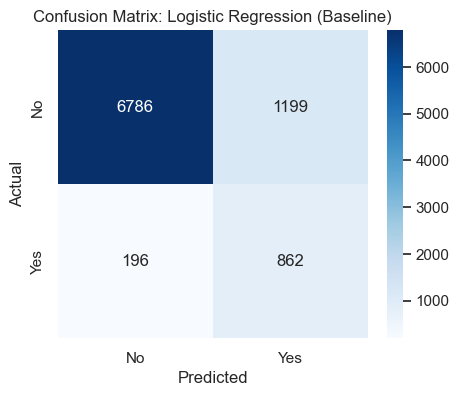


Classification Report: Logistic Regression (Baseline)

                  precision    recall  f1-score   support

 No Term Deposit       0.97      0.85      0.91      7985
Yes Term Deposit       0.42      0.81      0.55      1058

        accuracy                           0.85      9043
       macro avg       0.70      0.83      0.73      9043
    weighted avg       0.91      0.85      0.87      9043



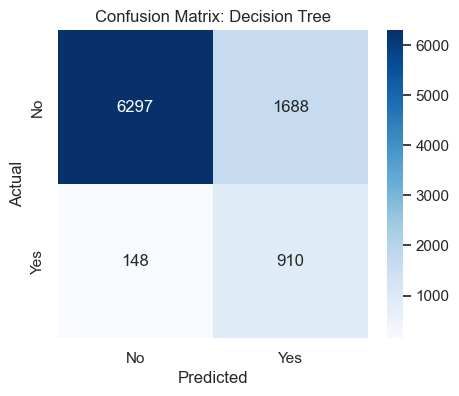


Classification Report: Decision Tree

                  precision    recall  f1-score   support

 No Term Deposit       0.98      0.79      0.87      7985
Yes Term Deposit       0.35      0.86      0.50      1058

        accuracy                           0.80      9043
       macro avg       0.66      0.82      0.69      9043
    weighted avg       0.90      0.80      0.83      9043



c:\Users\u507148\OneDrive - WNS\Documents\data_science\Week_1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


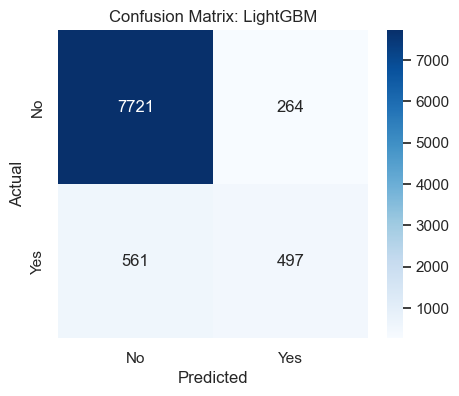


Classification Report: LightGBM

                  precision    recall  f1-score   support

 No Term Deposit       0.93      0.97      0.95      7985
Yes Term Deposit       0.65      0.47      0.55      1058

        accuracy                           0.91      9043
       macro avg       0.79      0.72      0.75      9043
    weighted avg       0.90      0.91      0.90      9043



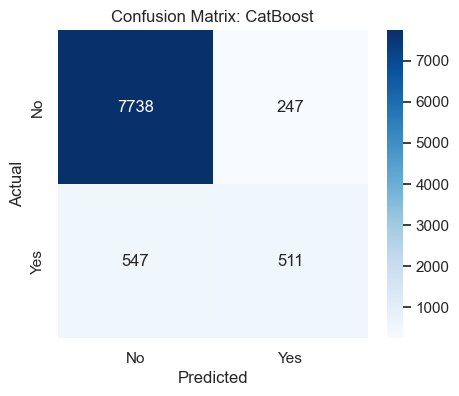


Classification Report: CatBoost

                  precision    recall  f1-score   support

 No Term Deposit       0.93      0.97      0.95      7985
Yes Term Deposit       0.67      0.48      0.56      1058

        accuracy                           0.91      9043
       macro avg       0.80      0.73      0.76      9043
    weighted avg       0.90      0.91      0.91      9043



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def error_analysis(pipeline, X_test, y_test, model_name):
    # Predict using full pipeline
    y_pred = pipeline.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()
    
    # Classification Report
    print(f"\nClassification Report: {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["No Term Deposit", "Yes Term Deposit"]))

# Run error analysis for each pipeline
for pipeline, name in [
    (log_reg_pipeline, "Logistic Regression (Baseline)"),
    (dt_pipeline_best, "Decision Tree"),
    (lgb_pipeline_best, "LightGBM"),
    (cat_pipeline_best, "CatBoost")
]:
    error_analysis(pipeline, X_test, y_test, name)

#### Saving Pipelines

In [53]:
import joblib

# Example: save trained pipelines
#joblib.dump(log_reg_pipeline, "log_reg_pipeline.pkl")
#joblib.dump(dt_pipeline_best, "dt_pipeline_best.pkl")
#joblib.dump(lgb_pipeline_best, "lgb_pipeline_best.pkl")
joblib.dump(cat_pipeline_best, "cat_pipeline_best.pkl")

print("✅ All pipelines saved successfully!")

✅ All pipelines saved successfully!


In [ ]:
pip install optuna

  Using cached sqlalchemy-2.0.43-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached greenlet-3.2.4-cp313-cp313-win_amd64.whl.metadata (4.2 kB)
Using cached sqlalchemy-2.0.43-cp313-cp313-win_amd64.whl (2.1 MB)
Using cached greenlet-3.2.4-cp313-cp313-win_amd64.whl (299 kB)

   ---------------------------------------- 0/7 [tqdm]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------------- ---------------------- 3/7 [colorlog]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   ---------------------- ----------------- 4/7 [sqlalchemy]
   --------